## Multi-Label Classification

### Overview

The goal of the modeling step is to develop a final model that effectively predicts the stated goal in the problem identification section. Review de types of models that would be appropriate given your modeling response and the features in your dataset and build two to three models. In addition to considering different algorithm types in your model selection, also consider applying model hyperparameter tunin operations. Be sure to define metrics you use to choose your final model. 

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix, classification_report

### Load Train and Test Data

In [2]:
train_df = pd.read_csv("../data/train_ready.csv")
test_df = pd.read_csv("../data/test_ready.csv")
comment_330 = test_df.iloc[[330]] # For prediction a random comment

In [3]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean,...,yourselfgo,yourselfgo fuck,youtube,youtube com,ytmnd,ytmnd ytmnd,zero,zionist,zuck,zuckerberg
0,2ec4b3bd396a3012,i am really confused about this there are so...,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16fb18070064a8e8,apology point taken dmcdevit i apologise fo...,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2aac02a9ff8d5798,classification it has been hard for me to fi...,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35ef99361edb8a3b,okay the rundown so far my first bloc...,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b11068094c52add9,yep not as easy to do though with the lesser...,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean,...,yourselfgo,yourselfgo fuck,youtube,youtube com,ytmnd,ytmnd ytmnd,zero,zionist,zuck,zuckerberg
0,32504958e6378134,is mostly inactive and visually unappealing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,965230a40160b971,a few responses some of your commen...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,789d5ba07879f808,semi protected edit request on november ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.233029,0.271072,0.0,0.0,0.0,0.0,0.0,0.0
3,cb3cb72274f28aeb,playoffs hockey my country goe...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,1a45b872642fde4a,human anus,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Separate Labels from Dataset

In [5]:
# Extract label columns 
label_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", "is_clean"]
train_df.drop(columns=["id", "comment_text"], inplace=True)
X_train = train_df.drop(columns=label_columns)
y_train = train_df[label_columns].astype(int)

test_df.drop(columns=["id", "comment_text"], inplace=True)
X_test = test_df.drop(columns=label_columns)
y_test = test_df[label_columns].astype(int)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24225, 5004) (24225, 7)
(4933, 5004) (4933, 7)


### 1. Multiple Binary Classifications (One vs. Rest)

In [7]:
%%time
# Apply LogisticRegression with OnevsRestClassifier
clf_1 = OneVsRestClassifier(LogisticRegression(max_iter=10000)).fit(X_train, y_train)

# X_test Predictions
y_pred_1 = clf_1.predict(X_test)
acc_1 = accuracy_score(y_test, y_pred_1)
class_rep_1 = classification_report(y_test, y_pred_1, zero_division=0)

print("Accuracy Score: {:.3f}".format(acc_1))
print(class_rep_1)

Accuracy Score: 0.964
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       489
           1       0.80      0.59      0.68        34
           2       0.86      0.87      0.87       305
           3       0.00      0.00      0.00        18
           4       0.83      0.88      0.86       286
           5       0.88      0.39      0.54        56
           6       1.00      1.00      1.00      4430

   micro avg       0.98      0.97      0.98      5618
   macro avg       0.76      0.67      0.70      5618
weighted avg       0.98      0.97      0.97      5618
 samples avg       0.99      0.99      0.99      5618

CPU times: user 8min 38s, sys: 16.5 s, total: 8min 55s
Wall time: 1min 8s


In [8]:
# Print multilabel confusion matrix.
# print(multilabel_confusion_matrix(y_test, y_pred_1, labels=clf_1.classes_))

### 2. OneVsRestClassifier - (MultinomialNB)


In [9]:
X_train.values

array([[  0., 291.,  53., ...,   0.,   0.,   0.],
       [  0., 366.,  66., ...,   0.,   0.,   0.],
       [  0., 567.,  98., ...,   0.,   0.,   0.],
       ...,
       [  3., 346.,  61., ...,   0.,   0.,   0.],
       [  2., 534., 107., ...,   0.,   0.,   0.],
       [  3., 182.,  37., ...,   0.,   0.,   0.]])

In [10]:
%%time
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# from sklearn.svm import SVC

# Perform classification per label
clf_2 = OneVsRestClassifier(MultinomialNB())
# clf_2 = OneVsRestClassifier(classifier=SVC())
clf_2.fit(X_train.values, y_train.values)
y_pred_2 = clf_2.predict(X_test)
acc_2 = accuracy_score(y_test, y_pred_2)
class_rep_2 = classification_report(y_test, y_pred_2, zero_division=0)

print("Accuracy Score: {:.3f}".format(acc_2))
print(class_rep_2)

/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/User

Accuracy Score: 0.623
              precision    recall  f1-score   support

           0       0.25      0.92      0.40       489
           1       0.44      0.12      0.19        34
           2       0.36      0.86      0.50       305
           3       0.02      0.28      0.05        18
           4       0.30      0.83      0.44       286
           5       0.10      0.68      0.18        56
           6       1.00      0.69      0.82      4430

   micro avg       0.58      0.73      0.65      5618
   macro avg       0.35      0.63      0.37      5618
weighted avg       0.85      0.73      0.73      5618
 samples avg       0.68      0.71      0.69      5618

CPU times: user 4.09 s, sys: 861 ms, total: 4.95 s
Wall time: 1.27 s


/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


### 3. Classifier Chains

In [11]:
# %%time
# from skmultilearn.problem_transform import ClassifierChain

# # Construct a bayesian conditioned chain of per label classifiers.
# clf_3 = ClassifierChain(classifier=LogisticRegression(max_iter=10000))

# # Train LogisticRegression model on train data
# clf_3.fit(X_train, y_train)
# y_pred_3 = clf_3.predict(X_test)
# acc_3 = accuracy_score(y_test, y_pred_3)
# class_rep_3 = classification_report(y_test, y_pred_3, zero_division=0)

# print("Accuracy Score: {:.3f}".format(acc_3))
# print(class_rep_3)

### 4. XGBoost

In [12]:
# %%time
# from xgboost import XGBClassifier

# clf_4 = OneVsRestClassifier(XGBClassifier(tree_method="hist", eval_metric="logloss"))
# clf_4.fit(X_train.values, y_train.values)
# y_pred_4 = clf_4.predict(X_test)
# acc_4 = accuracy_score(y_test, y_pred_4)
# class_rep_4 = classification_report(y_test, y_pred_4, zero_division=0)
# print("Accuracy Score: {:.3f}".format(acc_4))
# print(class_rep_4)

In [13]:
# Modeling with a Random Forest Classifier
    
from sklearn.ensemble import RandomForestClassifier

clf_5 = RandomForestClassifier()

clf_5.fit(X_train.values, y_train.values)
y_pred_5 = clf_5.predict(X_test)
acc_5 = accuracy_score(y_test, y_pred_5)
class_rep_5 = classification_report(y_test, y_pred_5, zero_division=0)
print("Accuracy Score: {:.3f}".format(acc_5))
print(class_rep_5)

/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy Score: 0.909
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       489
           1       0.00      0.00      0.00        34
           2       0.69      0.55      0.61       305
           3       0.00      0.00      0.00        18
           4       0.83      0.61      0.71       286
           5       0.00      0.00      0.00        56
           6       1.00      0.96      0.98      4430

   micro avg       0.95      0.90      0.92      5618
   macro avg       0.47      0.44      0.45      5618
weighted avg       0.93      0.90      0.91      5618
 samples avg       0.95      0.94      0.94      5618



In [14]:
test_df.sample()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,tags,is_clean,char_count,word_count,...,yourselfgo,yourselfgo fuck,youtube,youtube com,ytmnd,ytmnd ytmnd,zero,zionist,zuck,zuckerberg
362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Prediction of a comment

In [15]:
text = comment_330["comment_text"]
print(text)

330    im a cum guzzling motherfucker that likes boys...
Name: comment_text, dtype: object


In [16]:
text_labels = comment_330[label_columns]
print(text_labels)

     toxic  severe_toxic  obscene  threat  insult  identity_hate  is_clean
330    1.0           0.0      1.0     0.0     1.0            0.0       0.0


In [17]:
print(comment_330)

                   id                                       comment_text  \
330  74bf5e12e02177f6  im a cum guzzling motherfucker that likes boys...   

     toxic  severe_toxic  obscene  threat  insult  identity_hate  tags  \
330    1.0           0.0      1.0     0.0     1.0            0.0   3.0   

     is_clean  ...  yourselfgo  yourselfgo fuck  youtube  youtube com  ytmnd  \
330       0.0  ...         0.0              0.0      0.0          0.0    0.0   

     ytmnd ytmnd  zero  zionist  zuck  zuckerberg  
330          0.0   0.0      0.0   0.0         0.0  

[1 rows x 5013 columns]


In [18]:
comment_330 = comment_330.drop(columns=["id", "comment_text", "toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", "is_clean"])

In [57]:
predic_acc = []
classifiers = [clf_1, clf_2, clf_5]
for classif in classifiers:
    predic_acc.append(classif.predict(comment_330)[0])

/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/Users/rcepeda/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/User

In [102]:
# Create DataFrame with prediction results of comment 330

predictions_df = pd.DataFrame(predic_acc, columns=label_columns, 
                            index=["Logistic Regression", "Multinomial NB", "Random Forest"])
predictions_df = pd.concat([predictions_df, text_labels])
predictions_df.rename({330: "True Values"}, inplace=True)
predictions_df

,toxic,severe_toxic,obscene,threat,insult,identity_hate,is_clean
Logistic Regression,1.0,0.0,1.0,0.0,1.0,0.0,0.0
Multinomial NB,1.0,0.0,1.0,0.0,1.0,1.0,0.0
Random Forest,1.0,0.0,1.0,0.0,1.0,0.0,0.0
True Values,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [108]:
print(class_rep_2, class_rep_5)

              precision    recall  f1-score   support

           0       0.25      0.92      0.40       489
           1       0.44      0.12      0.19        34
           2       0.36      0.86      0.50       305
           3       0.02      0.28      0.05        18
           4       0.30      0.83      0.44       286
           5       0.10      0.68      0.18        56
           6       1.00      0.69      0.82      4430

   micro avg       0.58      0.73      0.65      5618
   macro avg       0.35      0.63      0.37      5618
weighted avg       0.85      0.73      0.73      5618
 samples avg       0.68      0.71      0.69      5618
               precision    recall  f1-score   support

           0       0.75      0.97      0.85       489
           1       0.00      0.00      0.00        34
           2       0.69      0.55      0.61       305
           3       0.00      0.00      0.00        18
           4       0.83      0.61      0.71       286
           5       0.00 

In [118]:
# Create metrics dataframe to compare resutls.
metrics_df = pd.DataFrame(data={"precision": [0.98, 0.85, 0.93],
                                "recall": [0.97, 0.73, 0.90],
                                "f1-score": [0.97, 0.73, 0.91]},
                        index=["Logistic Regression", 
                               "Multinomial NB",
                               "Random Forest"])
metrics_df

,precision,recall,f1-score
Logistic Regression,0.98,0.97,0.97
Multinomial NB,0.85,0.73,0.73
Random Forest,0.93,0.90,0.91


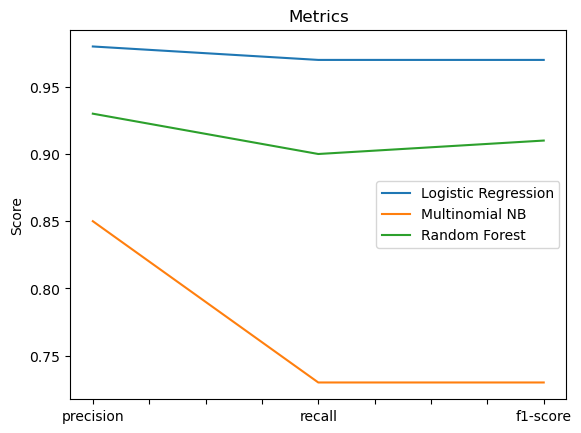

In [124]:
# Visualize metrics with a line chart.
metrics_df.T.plot(title="Metrics", ylabel="Score")
plt.show()